In [3]:
%matplotlib inline

# Plotting mathematics in matplotlib

One of the few complaints against `matplotlib` from Mathematicians and
Physicists alike is that the plots are ugly. Typically they are referring
to the default plots. For example if we wanted to plot a function say for
including a sketch in some solutions:

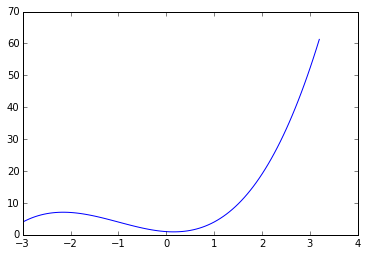

In [9]:
import matplotlib.pyplot as plt 
import numpy as np

def f(x):
    return x**3 + 3*x**2 - x + 1

fig, ax = plt.subplots()
x = np.linspace(-3, 3.2, 100)
ax.plot(x, f(x))

plt.show()

I will try to collect here some methods that I have found useful, almost all of these are taken from SO posts and other sites and where I remember I will be sure to give credit where it is due. I am simply collecting the information here to avoid repeated Googling!

## Axes location

The most distinct difference that we notice is the placement of the axes: on the bournding box rather than
at $(0, 0)$. While this makes practical sense when we are plotting data, for a function alone it is out-of-style. There are many ways to approach this, here are those that I know:

### The manual method

This is the most direct method in which we set the spin by hand:

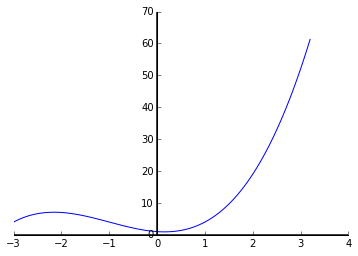

In [25]:
def CenterAxes(ax):
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_smart_bounds(True)
    ax.spines['bottom'].set_smart_bounds(True)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.axhline(linewidth=1.5, color='k')
    ax.axvline(linewidth=1.5, color='k')
    return ax

fig, ax = plt.subplots()
x = np.linspace(-3, 3.2, 100)
ax.plot(x, f(x))
ax = CenterAxes(ax)

plt.show()

### The SubplotZero method

Here is a second, somewhat simpler method which also allows you to easily add arrows. The downside is that we are using the `SubplotZero` axes class which is not as well built as the `matplotlib` axes class. For example, I cannot for the life of me figure out how to rotate the yticks!

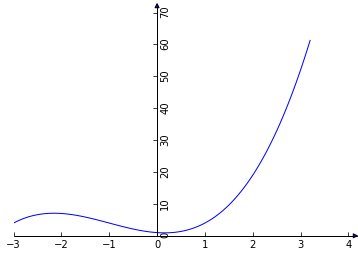

In [48]:
from mpl_toolkits.axes_grid.axislines import SubplotZero

fig = plt.figure()
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

ax.plot(x, f(x))

# Remove the old axes
for direction in ["left", "right", "bottom", "top"]:
    ax.axis[direction].set_visible(False)

# Add the new axes with arrows
for direction in ["xzero", "yzero"]:
    ax.axis[direction].set_axisline_style("-|>")
    ax.axis[direction].set_visible(True)
        
plt.show()

## Axis ticks and labels

Often we don't want to plot numerical labels, but instead some algebraic quantity such as $\pi$. There are two methods to do this that I am aware of.

### The 'ugly' way

This is the first, and most obvious way to get the desired effect. Unfortunately it is often discouraged by `matplotlib` developers and `SO` posts. Personally I see no harm, and often it is significantly easier to remember!

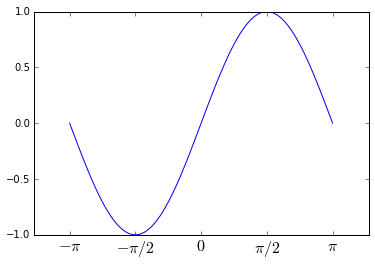

In [63]:
x = np.linspace(-np.pi, np.pi, 100)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x))

# Manual setup of the ticks and labels
xticks = np.arange(-np.pi, np.pi + np.pi/2, np.pi/2)
xticklabels = ["$-\pi$", "$-\pi/2$", "$0$", "$\pi/2$", "$\pi$"]

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, size=16)

plt.show()

If your not using the object-oriented `ax` methods then you can shorten this by
simply passing both the `xticks` and `xticklabels` to `plt.xticks()` as follows:

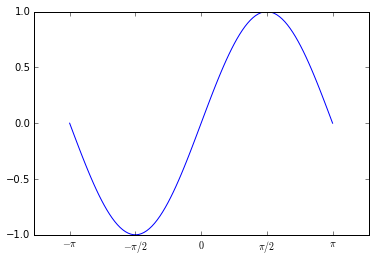

In [62]:
fig = plt.figure()
plt.plot(x, np.sin(x))

# Manual setup of the ticks and labels
xticks = np.arange(-np.pi, np.pi + np.pi/2, np.pi/2)
xticklabels = ["$-\pi$", "$-\pi/2$", "$0$", "$\pi/2$", "$\pi$"]

plt.xticks(xticks, xticklabels)

plt.show()

#### Automating multiples of $\pi$

Since it is such a common problem, we can also use a helper function rather than
defining the labels manually:

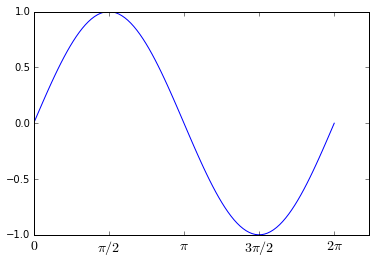

In [89]:
def is_multiple(x, y, tol=0.1):
    modx =np.mod(x, y) 
    if modx < tol or 1 - modx < tol:
        return int(float(x) / y)
    else:
        return None
    
def format_val(val, tol=0.1):
    if abs(abs(val) - 1) < tol:
        return ""
    else:
        return "{:1.0f}".format(val)
    
def GetPiLabel(val):
    coef = val / np.pi
    if abs(coef) < 0.1:
        return "$0$"
    
    coef_int = is_multiple(coef, 1.0)
    while coef_int:
        return "${}\pi$".format(format_val(coef))
    
    coef_half = is_multiple(coef, 0.5)
    while coef_half:
        return "${}\pi/{{2}}$".format(format_val(coef/0.5))
    
x = np.linspace(0, 2*np.pi, 100)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x))

# Manual setup of the ticks and labels
xticks = np.arange(0, 2*np.pi + np.pi/2, np.pi/2)
xticklabels = [GetPiLabel(xtick) for xtick in xticks]

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, size=14)

plt.show()

Of course a more powerful function would be better than created generic fractions.

### The 'pretty' way

The advised way to set the labels is through the `matplotlib.ticker` method. This method is lifted pretty much directly from this [example in the docs](http://matplotlib.org/examples/pylab_examples/histogram_percent_demo.html). We can also use the function defined earlier on, but we need to modify it slightly to accept a `position` which is subsequently ignored.

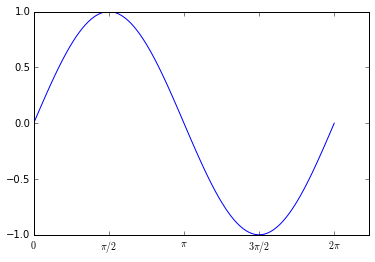

In [98]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, FuncFormatter

def GetPiLabel(val, position):
    coef = val / np.pi
    if abs(coef) < 0.1:
        return "$0$"
    
    coef_int = is_multiple(coef, 1.0)
    while coef_int:
        return "${}\pi$".format(format_val(coef))
    
    coef_half = is_multiple(coef, 0.5)
    while coef_half:
        return "${}\pi/{{2}}$".format(format_val(coef/0.5))
    
x = np.linspace(0, 2*np.pi, 100)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x))

majorLocator   = MultipleLocator(np.pi/2)
ax.xaxis.set_major_locator(majorLocator)
majorFormatter = FuncFormatter(GetPiLabel)
ax.xaxis.set_major_formatter(majorFormatter)

plt.show()